In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import mpld3

from scipy.optimize import minimize
from sklearn import linear_model
from tools import make_track

sns.set()
#mpld3.enable_notebook()

In [4]:
prices = pd.read_csv(r"financial_data/prices.csv", index_col=0)
prices.index = pd.DatetimeIndex(prices.index)

mondays = pd.date_range(start=dt.date(2010,1,4), end=dt.date.today(), freq='7D')
returns = prices.reindex(mondays).ffill().pct_change().dropna()

sx5e = returns[["SX5E"]]
bch = returns.drop("SX5E", axis=1)

In [5]:
dates = returns.index.copy() 
n= len(dates)

sample_period = 8
reg_freq = 2

In [11]:
# Contraints linear regression with all coeff positive and sum = 1


a = np.array([1.2, 2.3, 4.2])
b = np.array([1, 5, 6])
c = np.array([5.4, 6.2, 1.9])

m = np.vstack([a,b,c])
y = np.array([5.3, 0.9, 5.6])

def loss(x):
    return np.sum(np.square((np.dot(x, m) - y)))

cons = ({'type': 'eq',
         'fun' : lambda x: np.sum(x) - 1.0})

x0 = np.zeros(m.shape[0])
res = minimize(loss, x0, method='SLSQP', constraints=cons,
               bounds=[(0, np.inf) for i in range(m.shape[0])], options={'disp': False})

print(res.x)
print(np.dot(res.x, m.T))
print(np.sum(np.square(np.dot(res.x, m) - y)))

[  7.76088097e-01   2.89122408e-14   2.23911903e-01]
[ 1.87173571  2.11955951  4.61630834]
18.817792344


In [8]:
df_weight = pd.DataFrame(columns=bch.columns)

for i in range((n-sample_period)//reg_freq):
    
    start = dates[i*reg_freq]
    end= dates[i*reg_freq+sample_period]
    
    m = bch.loc[start:end].values
    y = sx5e.loc[start:end].values
    
    def loss(x):
        return np.sum(np.square((np.dot(m,x) - y)))

    cons = ({'type': 'eq',
         'fun' : lambda x: np.sum(x) - 1.0})
    
    x0 = np.zeros(m.shape[1])
    
    res = minimize(loss, x0, method='SLSQP', constraints=cons,
               bounds=[(0, np.inf) for i in range(m.shape[1])], options={'disp': False})

    df_weight.loc[end] = res.x

df_weight.head()

,IBEX,DAX,FSTEMIB,CAC 40
2010-03-08,0.000000e+00,2.081668e-16,1.000000,0.000000e+00
2010-03-22,1.011938e-16,1.942890e-16,1.000000,0.000000e+00
2010-04-05,0.000000e+00,0.000000e+00,1.000000,2.146046e-17
2010-04-19,0.000000e+00,4.163336e-17,1.000000,0.000000e+00
2010-05-03,0.000000e+00,1.836562e-01,0.816344,1.005335e-17


In [9]:
prices_for_track = prices.loc[df_weight.index].drop("SX5E",axis=1)
replication = make_track(prices_for_track,df_weight)

df_res = prices.loc[df_weight.index][["SX5E"]]
df_res["OLS"] = replication

df_res = df_res/df_res.iloc[0]

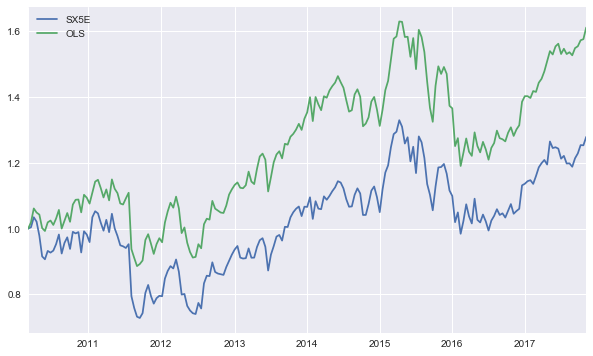

In [10]:
df_res.plot(figsize=(10,6))

In [13]:
df_weight.applymap(lambda x : np.round(x,3))

,IBEX,DAX,FSTEMIB,CAC 40
2010-03-08,0.000,0.000,1.000,0.000
2010-03-22,0.000,0.000,1.000,0.000
2010-04-05,0.000,0.000,1.000,0.000
2010-04-19,0.000,0.000,1.000,0.000
2010-05-03,0.000,0.184,0.816,0.000
2010-05-17,0.000,0.000,0.751,0.249
2010-05-31,0.000,0.000,0.673,0.327
2010-06-14,0.000,0.000,0.838,0.162
2010-06-28,0.000,0.000,0.973,0.027
2010-07-12,0.000,0.000,1.000,0.000
